<a href="https://colab.research.google.com/github/chrischriscris/Generative-Art-in-Python/blob/main/Christopher_G%C3%B3mez_Proyecto_CI2691_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://ykxyjwk.cluster028.hosting.ovh.net/logotipoUSB.png" width=300></img> 

# CI2691 Project

## A Genetic Algorithm using Python for Generative Art

Copyright (c) 2021 Christopher Gómez

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

Inspired and based on [Chris Cummins' work](https://chriscummins.cc/s/genetics/#) and his JavaScript implementation of this idea.

# Library instalation and importing

+ [Pillow](https://pillow.readthedocs.io/en/stable/index.html): A PIL (Python Image Library) fork. Adds image processing capabilities to the Python interpreter, fundamental for this project.
+ [Requests](https://requests.readthedocs.io/en/master/): HTTP for Humans™. Allows to send HTTP/1.1 requests extremely easily. Used here for downloading images programatically.
+ [Matplotlib](https://matplotlib.org/): A comprehensive library for creating static, animated, and interactive visualizations in Python. Used here to plot convergence of this method.
+ [IPywidgets](https://ipywidgets.readthedocs.io/en/latest/): Adds interactive HTML widgets for Jupyter notebooks and the IPython kernel.

In [ ]:
!pip install Pillow
!pip install requests
!pip install matplotlib
!pip install ipywidgets

In [ ]:
import sys
import requests
from random import random  # times faster than randint() as is written in C
from IPython.display import Image as Img, clear_output
from ipywidgets import interact_manual
import ipywidgets as wg
from PIL import Image, ImageDraw, ImageStat, ImageChops
import matplotlib.pyplot as plt

# Some utils

These are functions that are not part of the genetic algorithm itself, but are extensively needed and used in order to make it work properly and/or to simplify a little bit the things.

In [ ]:
def ri(a: int, b:int) -> int:
    """ Returns a random integer between a and b, both inclusive
    Args:
        a, b: integers, a <= b

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    return round(random()*(b-a)+a)

def get_img(url: str, name: str) -> None:
    """ Downloads and image from url and saves it with name specified
    Args:
        url: string
        name: filename (string)
        
    Adapted from https://parzibyte.me
    /blog/2018/03/26/descargar-imagen-gif-png-jpg-python/

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    # If name doesn't include .png extension, include it
    if not name.lower().endswith('.png'):
        name += '.png'

    try:
        img = requests.get(url).content 
        with open(name, 'wb') as fi:
            fi.write(img)
            print(f'Image succesfully downloaded with name {name}')
    except Exception as e:
        print(f'An error ocurred getting the image. ({e})')

def resize_image(path: str, max_size: int, new_name='') -> str:
    """ Resize image in path to max_size maintaining aspect ratio.
    
    Args:
        path: a filename (string)
        max_size: maximum size in pixels (positive integer)
    Returns:
        name of resized image (string)

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    try:
        # Open the image
        im = Image.open(path)
        width, height = im.size
    except FileNotFoundError:
        print('Failed operation, file does not exists.')
        sys.exit()

    # Resize to a max size
    ratio = width / height  # Saves aspect ratio

    if width > height:
        im = im.resize((max_size, round(max_size/ratio)))
    else:
        im = im.resize((round(max_size*ratio), max_size))

    # If name doesn't include .png extension, include it
    if not new_name:
        new_name = f'{path[:-4]}_resized'
    if not new_name.lower().endswith('.png'):
        new_name += '.png'

    im.save(new_name, 'PNG')
    im.close()
    return new_name   

def display_img(path: str) -> None:
    """ Shows the image in path in an IPython Notebook enviroment
    
    Args:
        path: a filename (string)

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    display(Img(filename=path))
    
def create_canvas(name: str, size: (int, int), color='black') -> str:
    """ Creates a new image with name and size specified

    Args:
        name: a filename (string)
        size: a tuple of nonnegative integers (width, height)
        color(optional): color of canvas (as an RGB tuple or an string, see
        Pillow documentation on colors) [default set to 'black']
    Returns:
        Name of generated image

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    # If name doesn't include .png extension, include it
    if not name.lower().endswith('.png'):
        name += '.png'
    
    im = Image.new('RGB', size, color)
    im.save(name, 'PNG')
    return name

Image succesfully downloaded with name colab.png


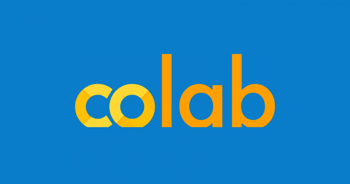

Image succesfully downloaded with name bioletamata.png


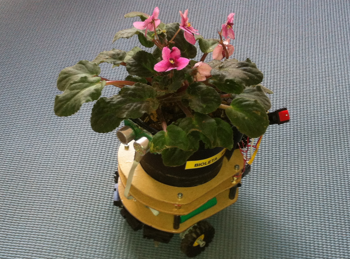

Image succesfully downloaded with name yhlqmdlg.png


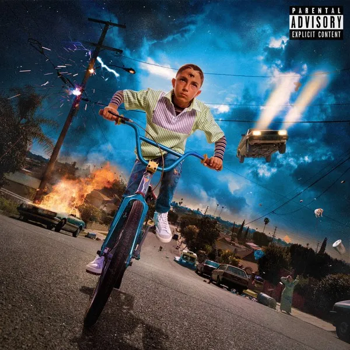

Image succesfully downloaded with name adele.png


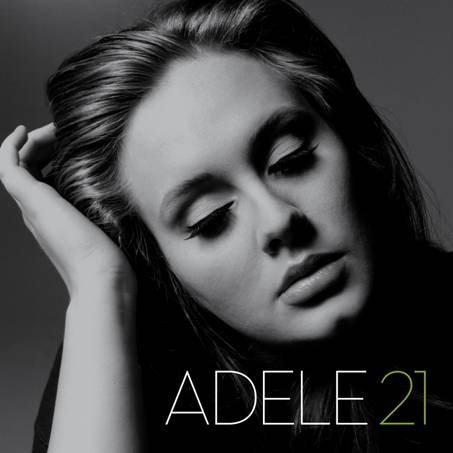

Image succesfully downloaded with name bulbasaur.png


In [ ]:
# --------- TESTS ------------
URL = 'https://miro.medium.com/max/1200/1*MYSepwn_bHkb_CdstXvnRg.png'
colab = 'colab.png'
get_img(URL, colab)
colab = resize_image(colab, 350)
display_img(colab)

URL = 'https://cchangusb.files.wordpress.com/2012/02/bioletamata2012021.jpg'
cchang = 'bioletamata.png'
get_img(URL, cchang)
cchang = resize_image(cchang, 350)
display_img(cchang)

URL = 'https://e.snmc.io/i/600/w/f2a0c36eab6625dbc8cc634f42159656/8019695/badbunny-yhlqmdlg-cover-art.jpg'
bad_bunny = 'yhlqmdlg.png'
get_img(URL, bad_bunny)
bad_bunny = resize_image(bad_bunny, 350)
display_img(bad_bunny)

URL = 'https://lh3.googleusercontent.com/-XCXv0h2b9K8/TY3b8F1NJqI/AAAAAAAAB0o/YPgrwNVqT5Y/s1600/Adele+21.jpg'
adele = 'adele.png'
get_img(URL, adele)
display_img(adele)

URL = 'https://static.wikia.nocookie.net/espokemon/images/4/43/Bulbasaur.png/revision/latest/scale-to-width-down/350?cb=20170120032346'
get_img(URL, 'bulbasaur')

# Genetics Random Lab ™ Fork

This is a "fork" of the other notebook, in which is implemented the original idea, so I'm going straight on this one. If you want to read the whole thing read the other notebook, I got rid of all the verbosity here.

Some things were simplified, and some test cells were deleted, that's because you can see them in the other notebook. However, the 'Asexual version' in this notebook gave me some really interesting results. I also let the main function with way less parameters than the others, as now I wanted to focuse just on getting the user control over just the number of shapes and the image quality, letting the algorithm run indefinitely until it is stopped via keyboard.

## Objects 

+ [**Coordinates / Points **](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#coordinate-system): A 2-tuple of integers (x, y) representing either a position on an image or its size. The coordinate system to be used has (0, 0) as upper left corner.
+ [**Color**](https://pillow.readthedocs.io/en/stable/reference/ImageColor.html#color-names): A 4-tuple of integers between 0 and 255 (R, G, B, A), both inclusive, representing the values of the 4 bands of a pixel. It can also have other formats, see PIL documentation.
+ **Mode**: An integer which indicate how a list of points will be drawn: 0 for triangle, 1 for rectangle, 2 for ellipse.
+ **z-index**: An integer defining how will shapes overlap when the individual is drawn. Higher z-index will be drawn first, so shapes with lower z-index will be drawn on top.
+ **Shape**: A list of two elements  \[list_of_points, color, mode, z-index\], with enough information for PIL to draw it onto a PNG file.
+ **Individual genotype**: A list of shapes \[g1, g2, ..., gn\], representing the genotype of an individual, shortened in docstrings as just "Individual".
+ **Population**: A list of elements of the form \[individual, fitness\].

In [ ]:
def gen_shape(mode: int, borders: (int, int), z_index: int) -> list:
    """ Returns a shape of the specified mode generated randomly
    
    Args:
        mode: integer between 0 and 2, both inclusive
        borders: tuple of integers representing the size of the canvas in which
                 the polygon will be drawn
        z_index: integer
 
    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    x, y = borders[0], borders[1]
    pointset = []
    max_p = max(x, y)
    center_x, center_y = ri(0, x), ri(0, y)
    
    # Generates two random points
    for _ in range(2):
        pointset.append((center_x + ri(-max_p//3, max_p//3),
                        center_y + ri(-max_p//3, max_p//3)))
        
    # If it is a triangle, generates one more
    if mode == 0:
        pointset.append((center_x + ri(-max_p//3, max_p//3),
                        center_y + ri(-max_p//3, max_p//3)))
    # Generates a random pixel value
    RGBA = (ri(0, 255), ri(0, 255), ri(0, 255), ri(150, 255))
    
    return [pointset, RGBA, mode, z_index]

def gen_individual(n_of_shapes, borders: (int, int), constraint='') -> list:
    """ Returns a list of sbapes generated randomly
 
    Args:
        n_of_shapes: pos integer
        borders: tuple of integers representing the size of the canvas in which
        the polygons will be drawn
        constraint: a list of modes
 
    Author: Christopher Gómez
    Date: 17th March, 2021
    """
    if constraint != '':
        return [gen_shape(constraint, borders, i) for i in reversed(range(n_of_shapes))]
    else:
        return [gen_shape(ri(0,2), borders, i) for i in reversed(range(n_of_shapes))]

def draw_individual(individual: list, size: (int, int), name='indiv.png', color='black') -> None:
    """ Generates the graphical representation of an individual specified
    by a list of paramenters, in a canvas of the given size and color
 
    Args:
        individual: an individual
        size: tuple of pos integers
        name (optional): filename (a string) [default set to 'indiv.png']
        color(optional): color of canvas [default set to 'black']
 
    Author: Christopher Gómez
    Date: 17th March, 2021
    """
    
    # If name doesn't include .png extension, include it
    if not name.lower().endswith('.png'):
        name += '.png'
        
    create_canvas(name, size, color)
    with Image.open(name) as im:
        draw = ImageDraw.Draw(im, 'RGBA')
        
        for shape in sorted(individual, key=lambda x: x[3], reverse=True):
            mode = shape[2]
            if mode == 0:
                draw.polygon(shape[0], shape[1])
            elif mode == 1:
                draw.rectangle(shape[0], shape[1])
            # As drawing function does not allow to draw circles where
            # x1 > x2 or y1 > y2, the drawing function takes care of
            # that and interchange the order if it's necessary
            else:
                x1, y1 = shape[0][0][0], shape[0][0][1]
                x2, y2 = shape[0][1][0], shape[0][1][1]
                if x1 > x2:
                    shape[0][0] = (x2, shape[0][0][1])
                    shape[0][1] = (x1, shape[0][1][1])
                if y1 > y2:
                    shape[0][0] = (shape[0][0][0], y2)
                    shape[0][1] = (shape[0][1][0], y1)
                draw.ellipse(shape[0], shape[1])
        im.save(name, 'PNG')

In [ ]:
def calc_fitness(path: str, individual: list) -> float:
    """ Computes the amount of similitude between the fenotype
    of an individual and the image in path. Does it by drawing
    the individual to 'temp_cpm.png' and calculating the difference
    between the two images, comparing channel values at the pixel level.
 
    Args:
        path: filename (a string)
        individual: an individual
 
    Adapted from Nicolas Hahn:
    https://github.com/nicolashahn/diffimg/blob/master/diffimg/__init__.py
    
    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    with Image.open(path) as im1:
        draw_individual(individual, im1.size, 'temp_cmp.png')
        with Image.open('temp_cmp.png') as im2:
            # Generate diff image in memory.
            try:
                diff_img = ImageChops.difference(im1, im2)
            except:
                diff_img = ImageChops.difference(im1.convert('RGB'), im2)
            # Calculate difference as a ratio.
            stat = ImageStat.Stat(diff_img)
            diff_ratio = sum(stat.rms) / (3 * 255)

    return 100 - diff_ratio*100

# Genetic Algorithm (Asexual Version)

This genetic algorithm will be based on asexual reproduction.

## How does it works?

It works by initializing a random individual and mutating it over generations. If the fitness of a newly generated individual (out of a certain mutation) is better than the previous, it keeps the individual and forget the last

In [ ]:
def mutate_individual(individual: list, p: float, borders: (int, int), n:int=10) -> list:
    """ Mutates the shapes of an individual with a probability of p.
    It can mutate position, color, z-index, or change the shape itself.

    Args:
        individual: list of shapes
        p:  float between 0 and 1
        n: pos integer, representing how much will be added or
        substracted randomly for every triangle choosen to mutate

    Author: Christopher Gómez
    Date: March 20th, 2021
    """
    mutated_ind = []
    for i, shape in enumerate(individual):
        if random() < p:
            pick = ri(0, 3)
            if pick == 0:  # Mutates position
                new_pointset = []
                for j in range(len(shape[0])):
                    new_pointset.append((shape[0][j][0] + ri(-n, n),
                                         shape[0][j][1] + ri(-n, n)))
                mutated_ind.append([new_pointset, shape[1], shape[2], shape[3]])
            elif pick == 1:  # Mutates color
                if ri(0, 1):  #  Redefines transparency
                    new_color = ((shape[1][0] + ri(-n, n)) % 256,   # R
                                 (shape[1][1] + ri(-n, n)) % 256,   # G
                                 (shape[1][2] + ri(-n, n)) % 256,   # B
                                 ri(150, 255))                      # A
                else:  #  Keeps transparency
                    new_color = ((shape[1][0] + ri(-n, n)) % 256,   # R
                                 (shape[1][1] + ri(-n, n)) % 256,   # G
                                 (shape[1][2] + ri(-n, n)) % 256,   # B
                                  shape[1][3])                      # A
                mutated_ind.append([shape[0], new_color, shape[2], shape[3]])
            elif pick == 2:  # Mutates z-index
                mutated_ind.append([shape[0], shape[1], shape[2], (shape[3]+ri(-2, 2))%len(individual)])
            else:  #  Generates brand-new shape
                mutated_ind.append(gen_shape(ri(0,2), borders, shape[3]))
        else:
            mutated_ind.append(shape)
    return mutated_ind

In [ ]:
def genetic_algorithm1(goal_image: str, n_of_shapes:int, img_size: int):
    """ Performs a genetic algorithm based on asexual reproduction
    Runs indefinitely and stops whenever the user interrupts the execution

    Args:
        goal_image: filename (a string)
        n_of_shapes: pos integer
        img_size: size of the image to compare (affects performance)

    Author: Christopher Gómez
    Date: March 22th, 2021
    """
    # Initialization variables
    goal_image_rs = resize_image(goal_image, img_size)
    size = Image.open(goal_image_rs).size
    individual = gen_individual(n_of_shapes, size)
    fitlist = []
    genlist = []
    gen = 0
    
    try:
        while True:
            # "Selection"
            individual_fitness = calc_fitness(goal_image_rs, individual)

            # For plotting purposes
            fitlist.append(individual_fitness)
            genlist.append(gen)

            # Styling
            clear_output(True)
            print(f'gen: {gen}, fitness: {individual_fitness:.2f}')
            draw_individual(individual, size)
            display_img('indiv.png')

            # Mutation
            new_ind_fit = 0
            while new_ind_fit <= individual_fitness:
                new_ind = mutate_individual(individual, 0.1, size, ri(20, max(size)//3))
                new_ind_fit = calc_fitness(goal_image_rs, new_ind)
                gen += 1
            individual = new_ind
            gen += 1
    except KeyboardInterrupt:
        pass
        
    # Last gen
    clear_output(True)
    print(f'gen: {gen}, fitness: {individual_fitness:.2f}')
    draw_individual(individual, size, 'result.png')
    display_img('result.png')
    display_img(goal_image_rs)
    
    plt.plot(genlist, fitlist, 'r', label='fitness')
    plt.xlabel('generations')
    plt.ylabel('fitness')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# Interactivity controls
g_img = wg.Text(value='bulbasaur.png', placeholder='Type something',
                description='Image to replicate: ')
nshapes = wg.IntSlider(min=50, max=1000, value=50, step=25,
                       description='Number of polygons: ')
quality = wg.IntSlider(min=100, max=600, value=100, step=10,
                        description='Size of image (in pixels): ')
plotshow = wg.Checkbox(value=False, description='Show realtime plot (bugged)',
                       disabled=False, indent=False)

In [ ]:
interact_manual(genetic_algorithm1, goal_image=g_img,
                n_of_shapes=nshapes, img_size=quality,
                show_realtime_plot=plotshow)

interactive(children=(Text(value='soni.png', description='Image to replicate: ', placeholder='Type something')…

<function __main__.genetic_algorithm1>

# Genetic Algorithm ("Full" version)

## How does it works?

It don't works ???? I rewrote every function to make it fit to this new workspace with three shapes and stuff and for some reason now it doesn't it doesn't even maintain the fitness average nor the best fitness, even when I carry the best individual directly onto the next generation.

I theorize it is maybe some trouble with lists referencing eachother, or something with the drawing function or the fitness function. Following the trace I found out really weird things happening but so far I'm unable to see where is the error and my back hurts.

If you want to see a genetic algorithm kind of "working" you can see the other that works just with polygons while I keep investigating on why this doesn't do his thing.

## Details

I really tried

In [ ]:
def gen_population(n_of_individuals: int, n_of_shapes: int,
                   borders: (int, int), constraint:int='') -> list:
    """ Returns a population, used to initialize the GA.
    
    Args:
        n_of_individuals: pos integer
        n_of_shapes: pos integer
        borders: tuple of pos integers
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    return [[gen_individual(n_of_shapes, borders, constraint), 0] for _ in range(n_of_individuals)]

def qualificate_and_order(population: list, path: str) -> None:
    """ Calculates the fitness of every individual in population and sorts it
    by fitness in ascending order.
    
    Args:
        population: list of elements of the form [individual, fitness]
        path: filename (a string)
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    # Calculate the fitness of every individual and adds it to the list
    for i, individual in enumerate(population):
        population[i][1] = calc_fitness(path, individual[0])

    # Order population in ascending order by fitness
    population.sort(key=lambda x: x[1])
    
def tournament_select(population: list, n: int) -> list:
    """ Selects n random individuals of the population and makes a tournament
    between them. Returns the fittest.
    
    Args:
        population: a population, previously ordered in ascending order by fitness
        n: pos integer
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    # List of n random individuals
    participants = [ri(0, len(population)-1) for _ in range(n)]
    return population[max(participants)]

def cross_individuals(mother: list, father: list) -> list:
    """ Returns a new individual with a random amount of shapes of the 
    mother and the father.
    
    Args:
        mother, father: individuals
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    # Ensures the interchange of genes is not empty
    m = ri(len(mother)//2 - len(mother)//3, 
          (len(mother)//2 + len(mother)//3))
    if ri(0, 1):
        return mother[:m] + father[m:]
    else:
        return father[:m] + mother[m:]
            
def mutate_individual(individual: list, p: float, borders: (int, int), n:int=10) -> list:
    """ Changes slightly approximately p out of 100 shapes of
    the given individual.

    Args:
        individual: list of shapes
        p:  float between 0 and 1, probability of a shape mutating
        n: pos integer, representing how much will be added or
        substracted randomly for every triangle choosen to mutate

    Author: Christopher Gómez
    Date: March 20th, 2021
    """
    for i, shape in enumerate(individual):
        if random() < p:
            pick = ri(0, 3)
            if pick == 0:  # Mutates position
                new_pointset = []
                for j in range(len(shape[0])):
                    new_pointset.append((shape[0][j][0] + ri(-n, n),
                                         shape[0][j][1] + ri(-n, n)))
                shape[0] = new_pointset
            elif pick == 1:  # Mutates color
                if ri(0, 1):  #  Redefines transparency
                    new_color = ((shape[1][0] + ri(-n, n)) % 256,   # R
                                 (shape[1][1] + ri(-n, n)) % 256,   # G
                                 (shape[1][2] + ri(-n, n)) % 256,   # B
                                 ri(150, 255))                      # A
                else:  #  Keeps transparency
                    new_color = ((shape[1][0] + ri(-n, n)) % 256,   # R
                                 (shape[1][1] + ri(-n, n)) % 256,   # G
                                 (shape[1][2] + ri(-n, n)) % 256,   # B
                                  shape[1][3])                      # A
                shape[1] = new_color
            elif pick == 2:  # Mutates z-index
                shape[3] += ri(-2, 2)%len(individual)
            else:  #  Generates brand-new shape
                individual[i] = (gen_shape(ri(0,2), borders, shape[3]))

def selection_and_crossover(population: list, path: str, f: object, *args) -> list:
    """ Performs selection and crossover given f to select

    Args:
        population: a population, previously ordered in ascending order by fitness
        f: selection function which accepts a population as first parameter
        *args: aditional arguments required for f, if any

    Author: Christopher Gómez
    Date: March 22th, 2021
    """

    offspring = list(reversed(population[-5:]))
    while len(offspring) != len(population):
        mother = f(population, *args)
        father = f(population, *args)

        offspring.append([cross_individuals(mother[0], father[0]), 0])

    return offspring

def perform_mutation(population: list, p1, p2: int, borders: (int, int), n: int) -> None:
    """ Mutates one over p individuals of the given population. Changes
    approximately var_amount over 100 triangles of every individual choosen
    to mutate

    Args:
        population: a population
        p: pos integer
        var_amount: integer between 1 and 100, both inclusive

    Author: Christopher Gómez
    Date: March 22th, 2021
    """
    for i in range(1, len(population)):
        if random()<p1:
            mutate_individual(population[i][0], p2, borders, n)
            population[i][1] = 0

def population_mean(population):
    suma = sum(population[i][1] for i in range(len(population)))
    return suma/len(population)

In [ ]:
def genetic_algorithm2(goal_image: str, n_of_individuals: int,
                       n_of_shapes: int, show_realtime_plot: bool) -> None:
    """ Performs a genetic algorithm based on sexual reproduction and elitism
    selection

    Args:
        goal_image: filename (a string)
        n_of_individuals: positive integer
        n_of_shapes: pos integer
        show_realtime_plot: boolean

    Author: Christopher Gómez
    Date: March 22th, 2021
    """
    # Initialization variables
    goal_image_rs = resize_image(goal_image, 100)
    size = Image.open(goal_image_rs).size
    population = gen_population(n_of_individuals, n_of_shapes, size)
    gen = 0
    fitlist = []
    meanlist = []
    genlist = []
    fittest = [[], 0]
    
    try:
        # Iterate over n_of_gens generations
        while True:

            # Calculate the fitness of every individual and updates the list
            qualificate_and_order(population, goal_image_rs)
            fittest = population[-1]

            # For plotting purposes
            fitlist.append(fittest[1])
            genlist.append(gen)
            meanlist.append(population_mean(population))

            # Styling
            clear_output(True)
            print(f'gen: {gen}, fitness: {fittest[1]:.2f}')
            draw_individual(fittest[0], size)
            display_img('indiv.png')
            if show_realtime_plot:
                plt.plot(genlist, fitlist, 'red', genlist, meanlist, 'blue')
                plt.xlabel('generations')
                plt.ylabel('top fitness')
                plt.show()

            # Selection and crossover, 30% of pressure
            population = selection_and_crossover(population, goal_image_rs, tournament_select, 4)
            # Mutation: one over 30 individuals will mutate
            perform_mutation(population, 0.02, 0.1, size, 20)

            gen += 1
    except KeyboardInterrupt:
        pass

     # Last gen
    qualificate_and_order(population, goal_image_rs)
    fittest = population[-1]
    
    fitlist.append(fittest[1])
    genlist.append(gen)
    meanlist.append(population_mean(population))

    # Styling
    clear_output(True)
    print(f'gen: {gen}, fitness: {fittest[1]:.2f}')
    draw_individual(fittest[0], size)
    display_img('indiv.png')
    
    plt.plot(genlist, fitlist, 'red', genlist, meanlist, 'blue')
    plt.xlabel('generations')
    plt.ylabel('fitness')
    plt.show()

In [ ]:
# Interactivity controls
g_img = wg.Text(value='bioletamata.png', placeholder='Type something',
                description='Image to replicate: ')
nshapes = wg.IntSlider(min=50, max=1000, value=50, step=25,
                     description='Number of polygons: ')
plotshow = wg.Checkbox(value=False, description='Show realtime plot (bugged)',
                       disabled=False, indent=False)
nind = wg.IntSlider(min=20, max=200, value=50, step = 10,
                    description='Number of individuals: ')

In [ ]:
interact_manual(genetic_algorithm2, goal_image=g_img,
                n_of_individuals=nind, n_of_shapes=nshapes,
                show_realtime_plot=plotshow)

interactive(children=(Text(value='bioletamata.png', description='Image to replicate: ', placeholder='Type some…

<function __main__.genetic_algorithm2(goal_image: str, n_of_individuals: int, n_of_shapes: int, show_realtime_plot: bool) -> None>

# Museum

The first GA in this notebook got me very impressed, I obtained some shockingly amazing results with this. The first one is from that Mario PNG, which it seemed to be everything but Mario in the other version of the algorithm, now you can recognize Mario without needing someone to tell you a hint of what that is. That's the result of over 1.6M generation running over 4-5 hours

## Epic Mario

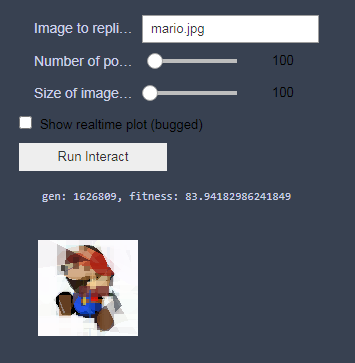

## Adele again

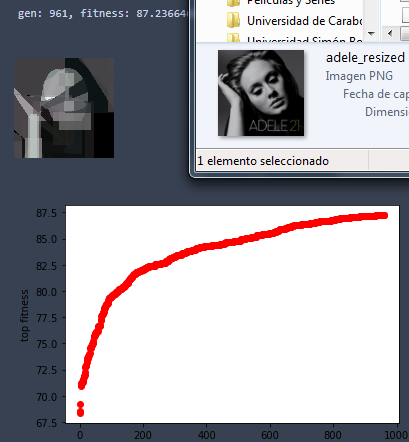

## Lalisa Manoba

Like 3-minutes or so. This algorith works pretty fast

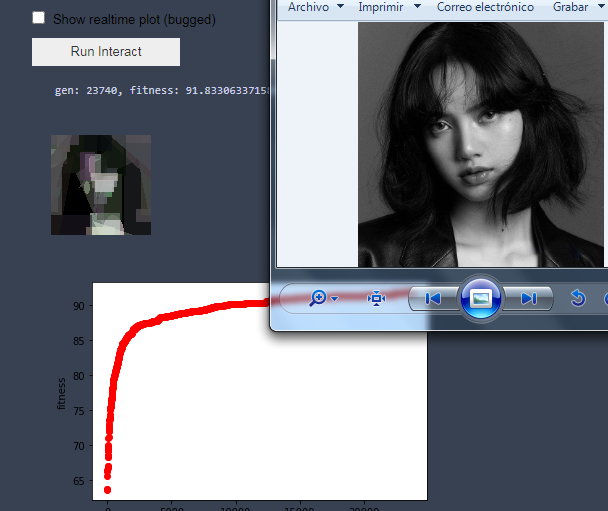

## Black Lives Matter

It supposed to say that but I had to interrupt the execution, it was like 1 hour. In 2 hours more maybe you could clearly read what it says

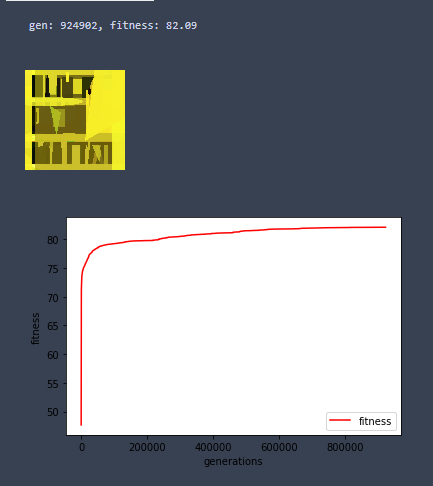

## Bioleta M. 

Again

## Monalisa

Monalisa, 1 exact hour running

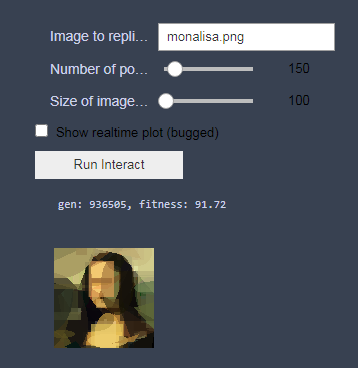

## Monalisa Parcial

As poetic as it sounds. This was running in the background and making my PC suffer while I was using it to type and send the answers for the last test. I wanted to go for a larger image. As the exam, this one lasted like 3 hours en 27 minutes

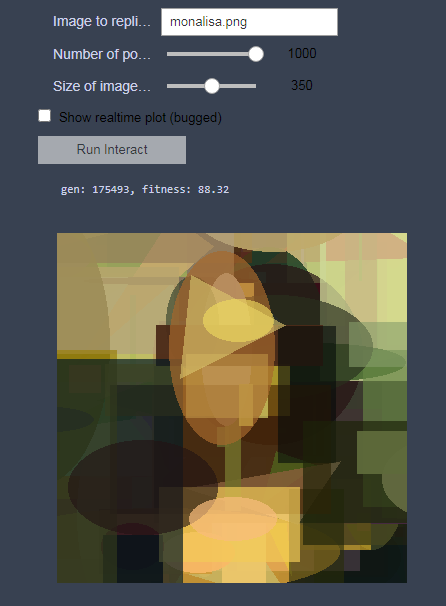

## Stary Night - Van Gogh

A nice painting with an interesting technique if you ask me. This was a little test, 1 minute running

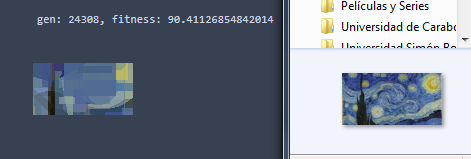

## Mario but it's actually just squares

Yes, I added some parameter in a pair of functions to restrict the GA to generate just shapes of one type. I didn't used that deature so much, tho, but just in case

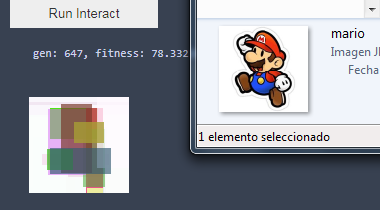

## Sonic

A 20-minutes-or-so Sonic (?) as someone in the Discord channel sent his Sonic and I wanted to make mine

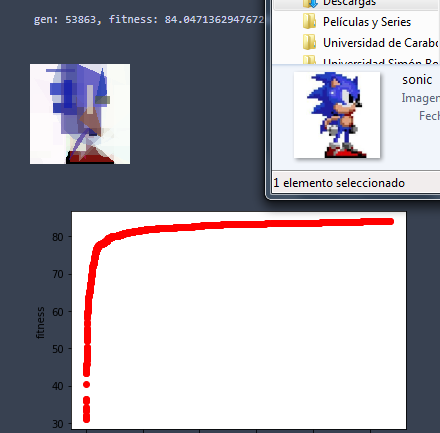

## Bulbasaur

Finally, I left this Bulbasaur cooking while I was uploading this screnshots. I'm gonna stop it right now. Seems pretty. First time I run this notebook in Goole Colab.

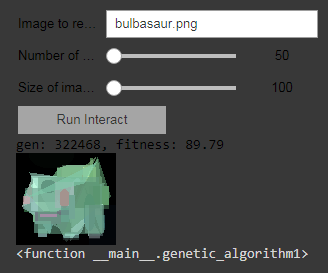